In [27]:
import import_ipynb
from Backends import *;
from testing import *;

In [2]:
# just run once
jakarta = fetch_backend('ibmq_jakarta', simulated = False)

In [28]:
# just run once
noisy_jakarta = fetch_backend('ibmq_jakarta', simulated = True)

ibmqfactory.load_account:WARNING:2022-04-15 14:20:22,458: Credentials are already in use. The existing account in the session will be replaced.


In [30]:
jbasis = noisy_jakarta.configuration().basis_gates

In [11]:
sim = QasmSimulator()

In [7]:
provider2 = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
quito = provider2.get_backend('ibmq_quito')
manila = provider2.get_backend('ibmq_manila')

In [13]:
noisy_quito = QasmSimulator.from_backend(quito)
noisy_manila = QasmSimulator.from_backend(manila)



In [8]:
jmap = jakarta.configuration().coupling_map
qmap = quito.configuration().coupling_map
mmap = manila.configuration().coupling_map

In [58]:
n=5
nsim_fourth_order_trotter_fids = []

for nsteps in range(1, 20):

    hot = ti_higher_order_trotter(order = 4, time = np.pi)
    qr, qc = basic_trotter_circuit(hot, nsteps, time = np.pi, num_qubits = 3)
    
    nqc = gen_qsd(Operator(qc.decompose()).data)
    
    gqcinstr =  geometric_compile(nqc.decompose(), 3, qmap)

    fid = test_3_qubits(gqcinstr, time = np.pi, backend = noisy_quito, verbose = False, shuttle = True)
    print(nsteps, fid)
    nsim_fourth_order_trotter_fids.append(fid)

state tomography fidelity = 0.1139 ± 0.0008
1 0.11386511866604355
state tomography fidelity = 0.5891 ± 0.0008
2 0.589113565906798
state tomography fidelity = 0.7022 ± 0.0005
3 0.7022341263240142
state tomography fidelity = 0.7259 ± 0.0024
4 0.7258906983703183
state tomography fidelity = 0.7260 ± 0.0015
5 0.7260384713804776
state tomography fidelity = 0.7212 ± 0.0015
6 0.7212250178773122
state tomography fidelity = 0.7209 ± 0.0023
7 0.7208542291571761
state tomography fidelity = 0.7492 ± 0.0010
8 0.7492132038625217
state tomography fidelity = 0.7265 ± 0.0024
9 0.7265126147303097
state tomography fidelity = 0.7077 ± 0.0028
10 0.7077237596345998
state tomography fidelity = 0.7012 ± 0.0020
11 0.7011669634937562
state tomography fidelity = 0.7004 ± 0.0008
12 0.7003821705925305
state tomography fidelity = 0.7204 ± 0.0027
13 0.7204424589891604
state tomography fidelity = 0.6931 ± 0.0007
14 0.6931174224581005
state tomography fidelity = 0.7079 ± 0.0025
15 0.7079038117883353
state tomography fi

In [59]:
n=5
fourth_order_trotter_fids = []

for nsteps in range(1, 20):

    hot = ti_higher_order_trotter(order = 4, time = np.pi)
    qr, qc = basic_trotter_circuit(hot, nsteps, time = np.pi, num_qubits = 3)
    
    nqc = gen_qsd(Operator(qc.decompose()).data)
    
    gqcinstr =  geometric_compile(nqc.decompose(), 3, qmap)

    fid = test_3_qubits(gqcinstr, time = np.pi, backend = quito, verbose = False, shuttle = True)
    print(nsteps, fid)
    fourth_order_trotter_fids.append(fid)

state tomography fidelity = 0.1134 ± 0.0012
1 0.11343612468745601
state tomography fidelity = 0.4927 ± 0.0039
2 0.492708173841052
state tomography fidelity = 0.5973 ± 0.0018
3 0.5973027504370859
state tomography fidelity = 0.6286 ± 0.0044
4 0.6285522491227545
state tomography fidelity = 0.6132 ± 0.0058
5 0.6132374551532438
state tomography fidelity = 0.6004 ± 0.0015
6 0.6003852616266501
state tomography fidelity = 0.6004 ± 0.0052
7 0.6003836652497051
state tomography fidelity = 0.6666 ± 0.0014
8 0.6665973750594018
state tomography fidelity = 0.6183 ± 0.0012
9 0.6183140123796861
state tomography fidelity = 0.6073 ± 0.0010
10 0.6073386240154489
state tomography fidelity = 0.6019 ± 0.0092
11 0.601897029355473
state tomography fidelity = 0.5605 ± 0.0016
12 0.5604667879401503
state tomography fidelity = 0.5867 ± 0.0049
13 0.5866801798249383
state tomography fidelity = 0.5202 ± 0.0017
14 0.5201849068914529
state tomography fidelity = 0.5297 ± 0.0060
15 0.52974056420781
state tomography fidel

In [134]:
# thiss is the latest experiment

hot = ti_higher_order_trotter(order = 4, time = np.pi)
qr, qc = basic_trotter_circuit(hot, 8, time = np.pi, num_qubits = 3)

nqc = gen_qsd(Operator(qc.decompose()).data)

gqcinstr =  geometric_compile(nqc.decompose(), 3, qmap)

fid = test_3_qubits(gqcinstr, time = np.pi, backend = quito, verbose = True, shuttle = True)
print(nsteps, fid)

Circuit Description
OrderedDict([('rz', 306), ('sx', 204), ('cx', 42), ('x', 2)])
global phase: 1.062
           ┌───────────────────────┐          ┌────┐          ┌───────┐»
q373710_0: ┤ Rz(0.831772215815322) ├──────────┤ √X ├──────────┤ Rz(π) ├»
           └─────────┬───┬─────────┘┌─────────┴────┴─────────┐└─┬────┬┘»
q373710_1: ──────────┤ X ├──────────┤ Rz(-0.683889613118501) ├──┤ √X ├─»
                     ├───┤          ├────────────────────────┤  ├────┤ »
q373710_2: ──────────┤ X ├──────────┤ Rz(-0.756343259962739) ├──┤ √X ├─»
                     └───┘          └────────────────────────┘  └────┘ »
q373710_3: ────────────────────────────────────────────────────────────»
                                                                       »
q373710_4: ────────────────────────────────────────────────────────────»
                                                                       »
«             ┌────┐ ┌────────┐┌─────────┐   ┌────┐  ┌──────────┐   ┌────┐   »
«q373710_0: ──┤ 

Job ID 625796f2528d78e79a498fa5
Job ID 6257971bf82d1669a8e3bcd0
Job ID 6257971f528d781300498fa7


IBMQJobInvalidStateError: 'Unable to retrieve result for job 625796f2528d78e79a498fa5. Job was cancelled.'

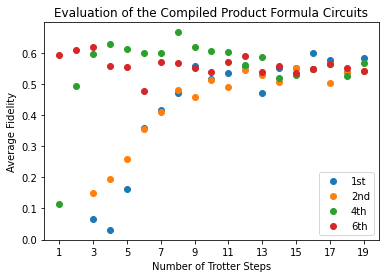

In [107]:
plt.scatter(range(3, 20), first_order_trotter_fids,  label = "1st")
plt.scatter(range(3, 20), second_order_trotter_fids, label = "2nd")
plt.scatter(range(1, 20), fourth_order_trotter_fids, label = "4th")
plt.scatter(range(1, 20), sixth_order_trotter_fids, label = "6th")

plt.title("Evaluation of the Compiled Product Formula Circuits")

plt.xticks(range(1, 20, 2))

plt.legend(loc='bottom right')

plt.xlabel("Number of Trotter Steps")
plt.ylabel("Average Fidelity")

plt.show()

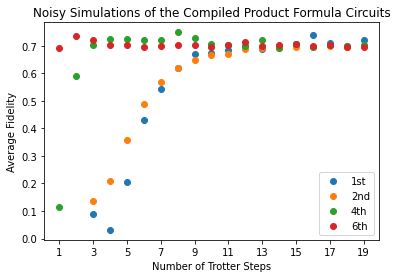

In [108]:
plt.scatter(range(3, 20), nsim_first_order_trotter_fids,  label = "1st")
plt.scatter(range(3, 20), nsim_second_order_trotter_fids, label = "2nd")
plt.scatter(range(1, 20), nsim_fourth_order_trotter_fids, label = "4th")
plt.scatter(range(1, 20), nsim_sixth_order_trotter_fids, label = "6th")

plt.xticks(range(1, 20, 2))

plt.legend(loc='bottom right')

plt.title("Noisy Simulations of the Compiled Product Formula Circuits")

plt.xlabel("Number of Trotter Steps")
plt.ylabel("Average Fidelity")

plt.show()

In [61]:
n=5
sixth_order_trotter_fids = []

for nsteps in range(1, 20):

    hot = ti_higher_order_trotter(order = 6, time = np.pi)
    qr, qc = basic_trotter_circuit(hot, nsteps, time = np.pi, num_qubits = 3)
    
    nqc = gen_qsd(Operator(qc.decompose()).data)
    
    gqcinstr =  geometric_compile(nqc.decompose(), 3, qmap)

    fid = test_3_qubits(gqcinstr, time = np.pi, backend = quito, verbose = False, shuttle = True)
    print(nsteps, fid)
    sixth_order_trotter_fids.append(fid)

state tomography fidelity = 0.5943 ± 0.0026
1 0.5943389676004179
state tomography fidelity = 0.6109 ± 0.0052
2 0.610922746069812
state tomography fidelity = 0.6199 ± 0.0067
3 0.6199105953663012
state tomography fidelity = 0.5571 ± 0.0026
4 0.5570892852140011
state tomography fidelity = 0.5562 ± 0.0022
5 0.5561686253337604
state tomography fidelity = 0.4788 ± 0.0014
6 0.47876408588965275
state tomography fidelity = 0.5718 ± 0.0043
7 0.571762002909651
state tomography fidelity = 0.5688 ± 0.0038
8 0.5687777361650865
state tomography fidelity = 0.5516 ± 0.0058
9 0.5516308596769673
state tomography fidelity = 0.5402 ± 0.0021
10 0.5402356480361079
state tomography fidelity = 0.5724 ± 0.0012
11 0.5723523294620411
state tomography fidelity = 0.5914 ± 0.0045
12 0.5913889885511513
state tomography fidelity = 0.5384 ± 0.0035
13 0.5384453309469617
state tomography fidelity = 0.5577 ± 0.0030
14 0.5577396348463014
state tomography fidelity = 0.5349 ± 0.0054
15 0.5349264142228107
state tomography fid

In [62]:
n=5
nsim_sixth_order_trotter_fids = []

for nsteps in range(1, 20):

    hot = ti_higher_order_trotter(order = 6, time = np.pi)
    qr, qc = basic_trotter_circuit(hot, nsteps, time = np.pi, num_qubits = 3)
    
    nqc = gen_qsd(Operator(qc.decompose()).data)
    
    gqcinstr =  geometric_compile(nqc.decompose(), 3, qmap)

    fid = test_3_qubits(gqcinstr, time = np.pi, backend = noisy_quito, verbose = False, shuttle = True)
    print(nsteps, fid)
    nsim_sixth_order_trotter_fids.append(fid)

state tomography fidelity = 0.6908 ± 0.0007
1 0.6907886263860976
state tomography fidelity = 0.7339 ± 0.0009
2 0.7339086954573419
state tomography fidelity = 0.7223 ± 0.0014
3 0.7223201419424171
state tomography fidelity = 0.7017 ± 0.0011
4 0.7016521444680587
state tomography fidelity = 0.7045 ± 0.0014
5 0.7044879216100123
state tomography fidelity = 0.6968 ± 0.0003
6 0.6967552216432065
state tomography fidelity = 0.6978 ± 0.0010
7 0.6977925902187506
state tomography fidelity = 0.7030 ± 0.0019
8 0.7029905999308873
state tomography fidelity = 0.7019 ± 0.0014
9 0.7018688062387727
state tomography fidelity = 0.6964 ± 0.0030
10 0.6963901418750297
state tomography fidelity = 0.7030 ± 0.0011
11 0.7029651765970274
state tomography fidelity = 0.7140 ± 0.0027
12 0.7139612755999495
state tomography fidelity = 0.7005 ± 0.0027
13 0.7004526828184803
state tomography fidelity = 0.7042 ± 0.0006
14 0.7041628267428038
state tomography fidelity = 0.7057 ± 0.0023
15 0.7056730384390985
state tomography fi

In [31]:
(Zero^Zero).to_matrix()

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

# Depths

In [32]:
prepare_system(3, np.pi)

NameError: name 'prepare_system' is not defined

In [119]:
#here
n=3
first_order_trotter_depths = []

for nsteps in range(3, 20):

    qr, qc = basic_trotter_circuit(ti_trotter, nsteps, time = np.pi, num_qubits = 3, qsd = True)
    qc = qc.decompose()

    gqcinstr =  geometric_compile(qc.decompose(), 3, line(3))
    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr)
    qc.append(gqcinstr, qr)
    qc = qc.decompose()
    
    first_order_trotter_depths.append(qc.count_ops()['cx'])

In [120]:
first_order_trotter_depths

[18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96, 102, 108, 114]

In [121]:
#here
n=3
second_order_trotter_depths = []

for nsteps in range(3, 20):

    qr, qc = second_order_trotter(nsteps, time = np.pi, num_qubits = 3, qsd = True)
    qc = qc.decompose()

    gqcinstr =  geometric_compile(qc.decompose(), 3, line(3))
    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr)
    qc.append(gqcinstr, qr)
    qc = qc.decompose()
    
    second_order_trotter_depths.append(qc.count_ops()['cx'])

In [127]:
second_order_trotter_depths

[21, 27, 33, 39, 45, 51, 57, 63, 69, 75, 81, 87, 93, 99, 105, 111, 117]

In [123]:
#here
n=3
fourth_order_trotter_depths = []

for nsteps in range(3, 20):

    hot = ti_higher_order_trotter(order = 4, time = np.pi)
    qr, qc = basic_trotter_circuit(hot, nsteps, time = np.pi, num_qubits = 3, qsd = True)
    qc = qc.decompose()

    gqcinstr =  geometric_compile(qc.decompose(), 3, line(3))
    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr)
    qc.append(gqcinstr, qr)
    qc = qc.decompose()
    
    fourth_order_trotter_depths.append(qc.count_ops()['cx'])

In [124]:
#here
n=3
sixth_order_trotter_depths = []

for nsteps in range(3, 20):

    hot = ti_higher_order_trotter(order = 6, time = np.pi)
    qr, qc = basic_trotter_circuit(hot, nsteps, time = np.pi, num_qubits = 3, qsd = True)
    qc = qc.decompose()

    gqcinstr =  geometric_compile(qc.decompose(), 3, line(3))
    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr)
    qc.append(gqcinstr, qr)
    qc = qc.decompose()
    
    sixth_order_trotter_depths.append(qc.count_ops()['cx'])

In [125]:
#here
n=3
compiled_depths = []

for nsteps in range(3, 20):

    hot = ti_higher_order_trotter(order = 4, time = np.pi)
    qr, qc = basic_trotter_circuit(hot, nsteps, time = np.pi, num_qubits = 3, qsd = True)
    qc = qc.decompose()
    
    nqc = gen_qsd(Operator(qc.decompose()).data)
    
    gqcinstr =  geometric_compile(nqc.decompose(), 3, line(3))
    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr)
    qc.append(gqcinstr, qr)
    qc = qc.decompose()
    
    compiled_depths.append(qc.count_ops()['cx'])

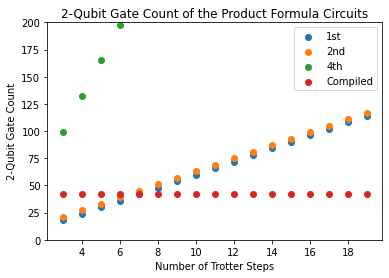

In [131]:
plt.scatter(range(3, 20), first_order_trotter_depths,  label = "1st")
plt.scatter(range(3, 20), second_order_trotter_depths, label = "2nd")
plt.scatter(range(3, 20), fourth_order_trotter_depths, label = "4th")
#plt.scatter(range(3, 20), sixth_order_trotter_depths, label = "6th")
plt.scatter(range(3, 20), compiled_depths, label = "Compiled")

ax = plt.gca()
ax.set_ylim([0, 200])

plt.legend(loc='top left')

plt.title("2-Qubit Gate Count of the Product Formula Circuits")

plt.xlabel("Number of Trotter Steps")
plt.ylabel("2-Qubit Gate Count")

plt.show()

In [111]:
qr, qc = basic_trotter_circuit(ti_trotter, 1, time = np.pi, num_qubits = 3)
qc.draw()

┌───────┐         
q250993_0: ┤0      ├─────────
           │  Trot │┌───────┐
q250993_1: ┤1      ├┤0      ├
           └───────┘│  Trot │
q250993_2: ─────────┤1      ├
                    └───────┘

In [118]:
qr, qc = second_order_trotter(15, time = np.pi, num_qubits = 3, qsd = True, coupling_map = line(3))
qc.draw()

global phase: 2.4107
             ┌──────────────┐ ┌──────────────┐       ┌─────────────┐  »
q251028_0: ──┤ U3(-π/2,0,0) ├─┤ U3(0,0,-π/2) ├──■────┤ U3(0,0,π/2) ├──»
           ┌─┴──────────────┴┐├──────────────┤┌─┴─┐┌─┴─────────────┴─┐»
q251028_1: ┤ U3(-3.1403,0,0) ├┤ U3(0,0,-π/2) ├┤ X ├┤ U3(0,0,-3.1413) ├»
           ├─────────────────┤├──────────────┤└───┘└─────────────────┘»
q251028_2: ┤ U3(-3.1403,0,0) ├┤ U3(0,0,-π/2) ├────────────────────────»
           └─────────────────┘└──────────────┘                        »
«            ┌──────────────┐   ┌──────────────┐      ┌──────────────┐»
«q251028_0: ─┤ U3(π/15,0,0) ├───┤ U3(0,0,-π/2) ├───■──┤ U3(0,0,-π/2) ├»
«           ┌┴──────────────┴┐┌─┴──────────────┴┐┌─┴─┐└┬────────────┬┘»
«q251028_1: ┤ U3(1.3627,0,0) ├┤ U3(0,0,-1.5721) ├┤ X ├─┤ U3(0,0,-π) ├─»
«           └────────────────┘└─────────────────┘└───┘ └────────────┘ »
«q251028_2: ──────────────────────────────────────────────────────────»
«                                                                     »
«           ┌───────────────┐                        ┌──────────────┐»
«q251028_0: ┤ U3(-π/15,0,0) ├─────────────────────■──┤ U3(0,0,-π/2) ├»
«           ├───────────────┴┐┌────────────────┐┌─┴─┐├──────────────┤»
«q251028_1: ┤ U3(1.5695,0,0) ├┤ U3(0,0,1.5695) ├┤ X ├┤ U3(-π/2,0,0) ├»
«           └────────────────┘└────────────────┘└───┘└──────────────┘»
«q251028_2: ─────────────────────────────────────────────────────────»
«                                                                    »
«              ┌─────────────┐    ┌──────────────┐┌──────────────┐     »
«q251028_0: ───┤ U3(π/2,0,0) ├────┤ U3(-π/2,0,0) ├┤ U3(0,0,-π/2) ├─────»
«           ┌──┴─────────────┴───┐├──────────────┤├──────────────┤     »
«q251028_1: ┤ U3(0,0,-0.0013233) ├┤ U3(-π/2,0,0) ├┤ U3(0,0,-π/2) ├──■──»
«           └────────────────────┘└──────────────┘└──────────────┘┌─┴─┐»
«q251028_2: ──────────────────────────────────────────────────────┤ X ├»
«                                                                 └───┘»
«                                                                       »
«q251028_0: ────────────────────────────────────────────────────────────»
«            ┌─────────────┐  ┌───────────────┐   ┌──────────────┐      »
«q251028_1: ─┤ U3(0,0,π/2) ├──┤ U3(2π/15,0,0) ├───┤ U3(0,0,-π/2) ├───■──»
«           ┌┴─────────────┴─┐├───────────────┴┐┌─┴──────────────┴┐┌─┴─┐»
«q251028_2: ┤ U3(0,0,-3.141) ├┤ U3(1.1532,0,0) ├┤ U3(0,0,-1.5722) ├┤ X ├»
«           └────────────────┘└────────────────┘└─────────────────┘└───┘»
«                                                                    »
«q251028_0: ─────────────────────────────────────────────────────────»
«           ┌──────────────┐┌────────────────┐                       »
«q251028_1: ┤ U3(0,0,-π/2) ├┤ U3(-2π/15,0,0) ├────────────────────■──»
«           └┬────────────┬┘├────────────────┤┌────────────────┐┌─┴─┐»
«q251028_2: ─┤ U3(0,0,-π) ├─┤ U3(1.5695,0,0) ├┤ U3(0,0,1.5695) ├┤ X ├»
«            └────────────┘ └────────────────┘└────────────────┘└───┘»
«                                                                    »
«q251028_0: ─────────────────────────────────────────────────────────»
«           ┌──────────────┐   ┌─────────────┐    ┌─────────────────┐»
«q251028_1: ┤ U3(0,0,-π/2) ├───┤ U3(π/2,0,0) ├────┤ U3(-3.1403,0,0) ├»
«           ├──────────────┤┌──┴─────────────┴───┐├─────────────────┤»
«q251028_2: ┤ U3(-π/2,0,0) ├┤ U3(0,0,-0.0013233) ├┤ U3(-3.1403,0,0) ├»
«           └──────────────┘└────────────────────┘└─────────────────┘»
«                                 ┌─────────────┐  ┌───────────────┐ »
«q251028_0: ──────────────────■───┤ U3(0,0,π/2) ├──┤ U3(2π/15,0,0) ├─»
«           ┌──────────────┐┌─┴─┐┌┴─────────────┴─┐├───────────────┴┐»
«q251028_1: ┤ U3(0,0,-π/2) ├┤ X ├┤ U3(0,0,-3.141) ├┤ U3(1.1532,0,0) ├»
«           ├──────────────┤└───┘└────────────────┘└────────────────┘»
«q251028_2: ┤ U3(0,0,-π/2) ├─────────────────────────────────────────»
«           └────────────

In [115]:
Trot_qr = QuantumRegister(num_qubits)
Trot_qc = QuantumCircuit(Trot_qr, name='Trot')


for index in ['x1', 'y1', 'z1', 'x2', 'y2', 'z2']:
    j, i = index[0], int(index[1]) - 1
    Trot_qc.append(QQ_gate(j, time = np.pi), [Trot_qr[i], Trot_qr[i+1]])
    
Trot_qc.draw()

┌──────────────────┐┌──────────────────┐┌──────────────────┐»
q251003_0: ┤0                 ├┤0                 ├┤0                 ├»
           │  circuit-1156025 ││  circuit-1156028 ││  circuit-1156031 │»
q251003_1: ┤1                 ├┤1                 ├┤1                 ├»
           └──────────────────┘└──────────────────┘└──────────────────┘»
q251003_2: ────────────────────────────────────────────────────────────»
                                                                       »
«                                                                       
«q251003_0: ────────────────────────────────────────────────────────────
«           ┌──────────────────┐┌──────────────────┐┌──────────────────┐
«q251003_1: ┤0                 ├┤0                 ├┤0                 ├
«           │  circuit-1156034 ││  circuit-1156037 ││  circuit-1156040 │
«q251003_2: ┤1                 ├┤1                 ├┤1                 ├
«           └──────────────────┘└──────────────────┘└──────────────────┘

# Manila

In [22]:
#here
n=5
jfirst_order_trotter_fids = []

for nsteps in range(3, 20):

    qr, qc = basic_trotter_circuit(ti_trotter, nsteps, time = np.pi, num_qubits = 3)
    nqc = gen_qsd(Operator(qc.decompose()).data)
    
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr)
    qc.append(nqc.to_instruction(), [0, 1, 2])

    gqcinstr =  geometric_compile(nqc.decompose(), 3, jmap)

    fid = test_3_qubits(gqcinstr, time = np.pi, backend = noisy_jakarta, verbose = False, shuttle = False)
    print(nsteps, fid)
    jfirst_order_trotter_fids.append(fid)



state tomography fidelity = 0.1020 ± 0.0028
3 0.10199731556532354
state tomography fidelity = 0.0405 ± 0.0042
4 0.0405008857058441
state tomography fidelity = 0.1954 ± 0.0022
5 0.19539121846761798
state tomography fidelity = 0.3682 ± 0.0059
6 0.3681501781379328
state tomography fidelity = 0.4464 ± 0.0015
7 0.4463558251173756
state tomography fidelity = 0.5334 ± 0.0008
8 0.5334317128467823
state tomography fidelity = 0.5519 ± 0.0019
9 0.5518510385254317
state tomography fidelity = 0.5602 ± 0.0043
10 0.5601863668527325
state tomography fidelity = 0.5628 ± 0.0045
11 0.5628129675442503
state tomography fidelity = 0.5853 ± 0.0069
12 0.5853038341400415
state tomography fidelity = 0.5592 ± 0.0058
13 0.5592321454529307
state tomography fidelity = 0.5646 ± 0.0042
14 0.5645948518330673
state tomography fidelity = 0.5888 ± 0.0027
15 0.588771242086
state tomography fidelity = 0.6070 ± 0.0041
16 0.6069825598837325
state tomography fidelity = 0.6022 ± 0.0039
17 0.6021507312717254
state tomography fi

In [21]:
#here
n=5
jsecond_order_trotter_fids = []

for nsteps in range(3, 20):

    qr, qc =  second_order_trotter(nsteps, time = np.pi, num_qubits = 3, qsd = True)
    nqc = gen_qsd(Operator(qc.decompose()).data)
    
    gqcinstr =  geometric_compile(nqc.decompose(), 3, line(3))

    fid = test_3_qubits(gqcinstr, time = np.pi, backend = noisy_jakarta, verbose = False, shuttle = False)
    print(nsteps, fid)
    jsecond_order_trotter_fids.append(fid)

state tomography fidelity = 0.1377 ± 0.0021
3 0.137655775902657
state tomography fidelity = 0.1851 ± 0.0062
4 0.18510567015043478
state tomography fidelity = 0.2933 ± 0.0027
5 0.29331141692213974
state tomography fidelity = 0.4036 ± 0.0066
6 0.4035565925486719
state tomography fidelity = 0.4779 ± 0.0009
7 0.47791459095298944
state tomography fidelity = 0.5143 ± 0.0035
8 0.5143096988555761
state tomography fidelity = 0.5341 ± 0.0034
9 0.5340650904684267
state tomography fidelity = 0.5414 ± 0.0034
10 0.5413862129034085
state tomography fidelity = 0.5534 ± 0.0024
11 0.5533668439688199
state tomography fidelity = 0.5523 ± 0.0051
12 0.5523052584108799
state tomography fidelity = 0.5638 ± 0.0061
13 0.5638356468796855
state tomography fidelity = 0.5759 ± 0.0038
14 0.5759459562381503
state tomography fidelity = 0.5677 ± 0.0021
15 0.5677291958126922
state tomography fidelity = 0.5626 ± 0.0024
16 0.562562138757674
state tomography fidelity = 0.5579 ± 0.0007
17 0.5578595423538713
state tomography

In [18]:
n=5
jfourth_order_trotter_fids = []

for nsteps in range(1, 20):

    hot = ti_higher_order_trotter(order = 4, time = np.pi)
    qr, qc = basic_trotter_circuit(hot, nsteps, time = np.pi, num_qubits = 3, qsd = True)
    
    nqc = gen_qsd(Operator(qc.decompose()).data)
    
    gqcinstr =  geometric_compile(nqc.decompose(), 3, line(3))

    fid = test_3_qubits(gqcinstr, time = np.pi, backend = noisy_jakarta, verbose = True, shuttle = False)
    print(nsteps, fid)
    jfourth_order_trotter_fids.append(fid)

Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 1.4682
                                                                              »
q50518_0: ────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q50518_1: ┤ Rz(0.255602130276612) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘         └───────┘  └────┘ »
q50518_2: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q50518_3: ──────────┤ X ├──────────┤ Rz(0.341552404118802) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────────────┘  └────┘ └───────┘»
q50518_4: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q50518_5: ───────

Job ID fc3c51f9-64e9-459c-acad-fb2f01c5cce8
Job ID daf01335-c316-44de-9fcc-8513e17223e2
Job ID 7c5bc043-a083-4e0d-98ff-b83d0a170140
state tomography fidelity = 0.1203 ± 0.0099
1 0.12028650493261535
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 1.439
                                                                               »
q50693_0: ─────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐          ┌───────┐  ┌────┐ »
q50693_1: ┤ Rz(-2.53486051718763) ├──────────┤ √X ├──────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘          └───────┘  └────┘ »
q50693_2: ─────────────────────────────────────────────────────────────────────»
                    ┌───┐           ┌──────────────────────┐   ┌────┐ ┌───────┐»
q50693_3: ──────────┤ X ├───────────┤ Rz(2.52457164955284) ├───┤ √X ├─┤ Rz(π) ├»
                    └───┘           └───────────────

Job ID 99e47fa4-e3ea-43e8-acbd-5f2aa33bb935
Job ID ec993274-20ed-44ec-815c-b6c314c15942
Job ID 365d1ae3-cacb-4eba-a369-1d99bb9a27d4
state tomography fidelity = 0.5301 ± 0.0047
2 0.5301427918444136
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 2.5941
                                                                              »
q50935_0: ────────────────────────────────────────────────────────────────────»
          ┌──────────────────────┐          ┌────┐          ┌───────┐  ┌────┐ »
q50935_1: ┤ Rz(2.41432471163094) ├──────────┤ √X ├──────────┤ Rz(π) ├──┤ √X ├─»
          └──────────────────────┘          └────┘          └───────┘  └────┘ »
q50935_2: ────────────────────────────────────────────────────────────────────»
                   ┌───┐           ┌──────────────────────┐   ┌────┐ ┌───────┐»
q50935_3: ─────────┤ X ├───────────┤ Rz(3.09582302159951) ├───┤ √X ├─┤ Rz(π) ├»
                   └───┘           └──────────────────────┘ 

Job ID 2547106c-4088-437e-8d4d-4db38e5be082
Job ID c43ab3f3-fee7-4ca6-8553-2425d7019f1a
Job ID 2b681021-f363-4939-ad45-a41b9ec71a23
state tomography fidelity = 0.6067 ± 0.0057
3 0.6067178184845304
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 4.1016
                                                                             »
q51244_0: ───────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐         ┌────┐         ┌───────┐  ┌────┐ »
q51244_1: ┤ Rz(-2.94509004929975) ├─────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘         └────┘         └───────┘  └────┘ »
q51244_2: ───────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌──────────────────────┐  ┌────┐ ┌───────┐»
q51244_3: ──────────┤ X ├──────────┤ Rz(-2.9320393156833) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └──────────────────────┘  └────┘ 

Job ID 33973f0d-b076-472e-a1f7-d87c7e4d94ef
Job ID b7e9b3aa-6ac0-42f2-9332-135fc6d63a32
Job ID 383764f2-ef7c-4d05-83a3-80e7f5f20ea6
state tomography fidelity = 0.5886 ± 0.0048
4 0.5886468772574315
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 2.8214
                                                                             »
q51620_0: ───────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐         ┌────┐         ┌───────┐  ┌────┐ »
q51620_1: ┤ Rz(0.212566861279327) ├─────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘         └────┘         └───────┘  └────┘ »
q51620_2: ───────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌──────────────────────┐  ┌────┐ ┌───────┐»
q51620_3: ──────────┤ X ├──────────┤ Rz(2.87827446683235) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └──────────────────────┘  └────┘ 

Job ID ce3d937a-7d96-4258-8a9f-cc6cc91a7a45
Job ID a10be3d6-17c2-48ae-9ad4-e17e9b1523d1
Job ID d17afdee-9427-4150-a483-cfa650be398a
state tomography fidelity = 0.5630 ± 0.0013
5 0.5630199090840243
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 5.8127
                                                                              »
q52063_0: ────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q52063_1: ┤ Rz(-1.64511913769522) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘         └───────┘  └────┘ »
q52063_2: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q52063_3: ──────────┤ X ├──────────┤ Rz(0.155106817566642) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────────────┘

Job ID 8e86668d-46f0-4363-8857-2b5e3bddd537
Job ID b82dea1f-f55d-4bc2-b8ee-ab000b3ea8b7
Job ID bd345ad6-f776-4af6-91e7-cf8d9120abbc
state tomography fidelity = 0.5757 ± 0.0041
6 0.5757123949983352
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 1.4532
                                                                       »
q52573_0: ─────────────────────────────────────────────────────────────»
          ┌────────────────────────┐          ┌────┐          ┌───────┐»
q52573_1: ┤ Rz(-0.606566129089188) ├──────────┤ √X ├──────────┤ Rz(π) ├»
          └────────────────────────┘          └────┘          └───────┘»
q52573_2: ─────────────────────────────────────────────────────────────»
                    ┌───┐            ┌──────────────────────┐   ┌────┐ »
q52573_3: ──────────┤ X ├────────────┤ Rz(1.88833563463989) ├───┤ √X ├─»
                    └───┘            └──────────────────────┘   └────┘ »
q52573_4: ─────────────────────────────────

Job ID d69dffb3-0e2d-4320-b380-70a20289baec
Job ID aeda851c-8d1d-45a6-b97b-5785a851211e
Job ID 9c61a6aa-ac37-4711-b187-695d49345695
state tomography fidelity = 0.5703 ± 0.0051
7 0.570344983769382
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 5.2146
                                                                              »
q53150_0: ────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q53150_1: ┤ Rz(-2.78597839334441) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘         └───────┘  └────┘ »
q53150_2: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q53150_3: ──────────┤ X ├──────────┤ Rz(-2.13844036413936) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────────────┘ 

Job ID 8674518d-dad0-4170-8b31-0b278440974d
Job ID 9510c778-a735-492e-9e46-ea9d44c68fad
Job ID e8545b2b-b0e6-4d88-9498-dcd108435378
state tomography fidelity = 0.5653 ± 0.0023
8 0.5653167050761926
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 3.06
                                                                              »
q53794_0: ────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q53794_1: ┤ Rz(-2.96729656294433) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘         └───────┘  └────┘ »
q53794_2: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q53794_3: ──────────┤ X ├──────────┤ Rz(0.346430915987685) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────────────┘  

Job ID 56360f25-6b55-4b29-b8a0-e80a2e2ed1d1
Job ID e93ffc5d-c677-4093-ae7c-a380060aad45
Job ID d1a98ecc-4b9a-4e18-a975-afa5ef893670
state tomography fidelity = 0.5709 ± 0.0058
9 0.570931826208234
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 5.8328
                                                                              »
q54505_0: ────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q54505_1: ┤ Rz(0.460206342116479) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘         └───────┘  └────┘ »
q54505_2: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q54505_3: ──────────┤ X ├──────────┤ Rz(0.180828816516957) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────────────┘ 

Job ID e13b8532-c155-4b73-bc5e-b7fa8cbfd9d5
Job ID 9a119c7c-0e91-4a21-a240-eb15930f494d
Job ID a5d12a04-1569-4ad2-b504-cf5ea7790754
state tomography fidelity = 0.5655 ± 0.0028
10 0.5654680127890873
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 2.5147
                                                                             »
q55283_0: ───────────────────────────────────────────────────────────────────»
          ┌──────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q55283_1: ┤ Rz(0.16453491049145) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └──────────────────────┘          └────┘         └───────┘  └────┘ »
q55283_2: ───────────────────────────────────────────────────────────────────»
                   ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q55283_3: ─────────┤ X ├──────────┤ Rz(-3.05073314216379) ├──┤ √X ├─┤ Rz(π) ├»
                   └───┘          └───────────────────────┘  └────┘

Job ID ed671b02-ac42-40ac-88f1-6dd05ad4d7d0
Job ID aadb6ee7-4e53-4f69-b81f-eb650bf06a12
Job ID 5a7ed23e-80e8-4315-bf2f-08296091fffe
state tomography fidelity = 0.5762 ± 0.0027
11 0.576159569453853
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 5.7097
                                                                               »
q56128_0: ─────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐          ┌───────┐  ┌────┐ »
q56128_1: ┤ Rz(-2.17302414993505) ├──────────┤ √X ├──────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘          └───────┘  └────┘ »
q56128_2: ─────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐   ┌────┐ ┌───────┐»
q56128_3: ──────────┤ X ├──────────┤ Rz(-2.72384535807464) ├───┤ √X ├─┤ Rz(π) ├»
                    └───┘          └────────────────

Job ID 5f5c8dd6-6685-4a1e-8935-3cffba5c7e4f
Job ID 56de848d-3ad7-41fc-af82-725dd8b9c196
Job ID 21b427a9-7636-46da-a36c-638abf5414fd
state tomography fidelity = 0.5652 ± 0.0049
12 0.5652091147804147
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 3.3257
                                                                              »
q57040_0: ────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q57040_1: ┤ Rz(0.222733349619304) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘         └───────┘  └────┘ »
q57040_2: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q57040_3: ──────────┤ X ├──────────┤ Rz(0.260518328765453) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────────────

Job ID c25fa27b-4e71-4125-bfce-fda7b5b0b3a8
Job ID 8948f9e1-c17d-43c0-ae91-337925d46eaf
Job ID 5b1af905-3706-4498-b6b6-e6b2f596c903
state tomography fidelity = 0.5649 ± 0.0046
13 0.5648522239934127
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 3.1398
                                                                              »
q58019_0: ────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q58019_1: ┤ Rz(0.158327972590567) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘         └───────┘  └────┘ »
q58019_2: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q58019_3: ──────────┤ X ├──────────┤ Rz(-1.36023026542529) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────────────

Job ID 82f2758e-0e2a-4454-ab34-1e7c2c0dbc17
Job ID 256b41e7-7ab5-4af2-96e3-e8ce51ea3c25
Job ID 04e46b97-cf13-4643-bb0c-022aa201fc49
state tomography fidelity = 0.5840 ± 0.0066
14 0.584002299169548
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 4.829
                                                                              »
q59065_0: ────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q59065_1: ┤ Rz(0.345866612692376) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘         └───────┘  └────┘ »
q59065_2: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q59065_3: ──────────┤ X ├──────────┤ Rz(0.652683389563538) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────────────┘ 

Job ID 079028cd-cf11-43a2-842d-d12cfe6b2d82
Job ID dd291735-7b06-4c5c-a3b1-8ce459cbabfc
Job ID 2e4b81c9-3ebf-42bf-9a1b-a41245268603
state tomography fidelity = 0.5673 ± 0.0063
15 0.5672955487461292
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 1.1844
                                                                               »
q60178_0: ─────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐          ┌───────┐  ┌────┐ »
q60178_1: ┤ Rz(0.927241935696159) ├──────────┤ √X ├──────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘          └───────┘  └────┘ »
q60178_2: ─────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐   ┌────┐ ┌───────┐»
q60178_3: ──────────┤ X ├──────────┤ Rz(-3.01371970436273) ├───┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────

Job ID 10cd9595-5171-4e81-a97f-2103737cf848
Job ID 9f148540-342b-48c9-b649-951a2c40dbfe
Job ID 1ca89457-c79e-4bb3-b899-52889d6242ad
state tomography fidelity = 0.5561 ± 0.0046
16 0.5560576961324731
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 1.6225
                                                                              »
q61358_0: ────────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q61358_1: ┤ Rz(0.195315186627969) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘          └────┘         └───────┘  └────┘ »
q61358_2: ────────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q61358_3: ──────────┤ X ├──────────┤ Rz(-2.91585005250179) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └───────────────────────

Job ID 4d977361-c7a4-40dc-9949-f6f8eb573122
Job ID 2c2c1a1a-8bcf-4d31-956a-c37563f254b1
Job ID 6202de94-168d-49e8-99a3-3239be8fbd8e
state tomography fidelity = 0.5638 ± 0.0027
17 0.5637573541961491
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 1.5431
                                                                             »
q62605_0: ───────────────────────────────────────────────────────────────────»
          ┌──────────────────────┐          ┌────┐         ┌───────┐  ┌────┐ »
q62605_1: ┤ Rz(-2.8192949986328) ├──────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └──────────────────────┘          └────┘         └───────┘  └────┘ »
q62605_2: ───────────────────────────────────────────────────────────────────»
                   ┌───┐          ┌───────────────────────┐  ┌────┐ ┌───────┐»
q62605_3: ─────────┤ X ├──────────┤ Rz(0.502119805743417) ├──┤ √X ├─┤ Rz(π) ├»
                   └───┘          └───────────────────────┘  └────┘

Job ID 2aa087fe-29bc-4d31-8756-5f36f8cbf02a
Job ID 6ac857de-cb99-491a-9e1e-39b899fb4de4
Job ID c0ca7339-898c-4039-b1be-981a4d5b785e
state tomography fidelity = 0.5708 ± 0.0059
18 0.5708004162792095
Circuit Description
OrderedDict([('rz', 312), ('sx', 208), ('cx', 42), ('x', 2)])
global phase: 5.2209
                                                                             »
q63919_0: ───────────────────────────────────────────────────────────────────»
          ┌───────────────────────┐         ┌────┐         ┌───────┐  ┌────┐ »
q63919_1: ┤ Rz(-2.44271409598444) ├─────────┤ √X ├─────────┤ Rz(π) ├──┤ √X ├─»
          └───────────────────────┘         └────┘         └───────┘  └────┘ »
q63919_2: ───────────────────────────────────────────────────────────────────»
                    ┌───┐          ┌──────────────────────┐  ┌────┐ ┌───────┐»
q63919_3: ──────────┤ X ├──────────┤ Rz(-2.8381791312066) ├──┤ √X ├─┤ Rz(π) ├»
                    └───┘          └──────────────────────┘  └────┘

Job ID 1c235e26-54f5-426d-93cc-a2e5002fae15
Job ID 8e31e4e0-efed-44e5-bba8-dcd7e9aa4106
Job ID ff19e2e8-156e-4d36-8f41-a9336814c33c
state tomography fidelity = 0.5753 ± 0.0018
19 0.5753421547739602


In [26]:
jfourth_order_trotter_fids

[0.12028650493261535,
 0.5301427918444136,
 0.6067178184845304,
 0.5886468772574315,
 0.5630199090840243,
 0.5757123949983352,
 0.570344983769382,
 0.5653167050761926,
 0.570931826208234,
 0.5654680127890873,
 0.576159569453853,
 0.5652091147804147,
 0.5648522239934127,
 0.584002299169548,
 0.5672955487461292,
 0.5560576961324731,
 0.5637573541961491,
 0.5708004162792095,
 0.5753421547739602]

In [24]:
n=5
jsixth_order_trotter_fids = []

for nsteps in range(1, 20):

    hot = ti_higher_order_trotter(order = 6, time = np.pi)
    qr, qc = basic_trotter_circuit(hot, nsteps, time = np.pi, num_qubits = 3)
    
    nqc = gen_qsd(Operator(qc.decompose()).data)
    
    gqcinstr =  geometric_compile(nqc.decompose(), 3, line(3))

    fid = test_3_qubits(gqcinstr, time = np.pi, backend = noisy_jakarta, verbose = False, shuttle = False)
    print(nsteps, fid)
    jsixth_order_trotter_fids.append(fid)

state tomography fidelity = 0.5852 ± 0.0027
1 0.5851777752578035
state tomography fidelity = 0.6277 ± 0.0038
2 0.6276528569640947
state tomography fidelity = 0.5902 ± 0.0034
3 0.5902063999043877
state tomography fidelity = 0.5832 ± 0.0035
4 0.5832397926283573
state tomography fidelity = 0.5761 ± 0.0035
5 0.5760690566800811
state tomography fidelity = 0.5759 ± 0.0071
6 0.5759021875010005
state tomography fidelity = 0.5728 ± 0.0019
7 0.5728468486497232
state tomography fidelity = 0.5870 ± 0.0074
8 0.5870202026480883
state tomography fidelity = 0.5906 ± 0.0037
9 0.5906332754966978
state tomography fidelity = 0.5767 ± 0.0081
10 0.5767290263841773
state tomography fidelity = 0.5758 ± 0.0043
11 0.5757782951889182
state tomography fidelity = 0.6089 ± 0.0070
12 0.6088589889435024
state tomography fidelity = 0.5814 ± 0.0020
13 0.5813988385643803
state tomography fidelity = 0.5613 ± 0.0020
14 0.561274099535182
state tomography fidelity = 0.5671 ± 0.0026
15 0.5670651059410013
state tomography fid

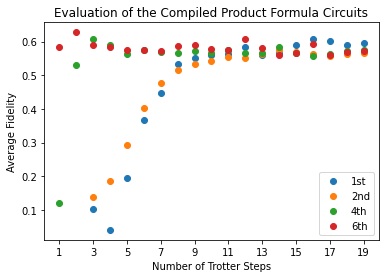

In [25]:
plt.scatter(range(3, 20), jfirst_order_trotter_fids,  label = "1st")
plt.scatter(range(3, 20), jsecond_order_trotter_fids, label = "2nd")
plt.scatter(range(1, 20), jfourth_order_trotter_fids, label = "4th")
plt.scatter(range(1, 20), jsixth_order_trotter_fids, label = "6th")

plt.xticks(range(1, 20, 2))

plt.legend(loc='bottom right')

plt.title("Evaluation of the Compiled Product Formula Circuits")

plt.xlabel("Number of Trotter Steps")
plt.ylabel("Average Fidelity")

plt.show()